In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_test=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_test.csv')
df_train=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_train.csv')


df_train

,Unnamed: 0,rainfall_train.fc_year,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,...,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
0,1,A,5,1,9,STN001,3,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,A,5,1,9,STN001,6,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,A,5,1,9,STN001,9,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,A,5,1,9,STN001,12,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,A,5,1,9,STN001,15,A,5,2,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,...,7,2,2,0,0,0,0,0,0.5,3
1457248,1457249,C,9,30,21,STN020,231,C,10,10,...,9,5,3,1,0,0,0,0,0.0,0
1457249,1457250,C,9,30,21,STN020,234,C,10,10,...,9,5,3,1,0,0,0,0,1.9,4
1457250,1457251,C,9,30,21,STN020,237,C,10,10,...,6,4,2,2,0,0,0,0,1.9,4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy
#import shap
#from feature_engine.selection import DropCorrelatedFeatures

In [ ]:
# 컬럼명에서 'rainfall_train.' 부분 제거
df_train.columns = df_train.columns.str.replace('rainfall_train.', '', regex=False)
df_train

,Unnamed: 0,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,1,A,5,1,9,STN001,3,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,A,5,1,9,STN001,6,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,A,5,1,9,STN001,9,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,A,5,1,9,STN001,12,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,A,5,1,9,STN001,15,A,5,2,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,...,7,2,2,0,0,0,0,0,0.5,3
1457248,1457249,C,9,30,21,STN020,231,C,10,10,...,9,5,3,1,0,0,0,0,0.0,0
1457249,1457250,C,9,30,21,STN020,234,C,10,10,...,9,5,3,1,0,0,0,0,1.9,4
1457250,1457251,C,9,30,21,STN020,237,C,10,10,...,6,4,2,2,0,0,0,0,1.9,4


In [ ]:
#class_interval이 -999는 결측치로 삭제하기
df_train = df_train[df_train['class_interval'] != -999]
df_train

,Unnamed: 0,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,1,A,5,1,9,STN001,3,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,A,5,1,9,STN001,6,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,A,5,1,9,STN001,9,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,A,5,1,9,STN001,12,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,A,5,1,9,STN001,15,A,5,2,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,...,7,2,2,0,0,0,0,0,0.5,3
1457248,1457249,C,9,30,21,STN020,231,C,10,10,...,9,5,3,1,0,0,0,0,0.0,0
1457249,1457250,C,9,30,21,STN020,234,C,10,10,...,9,5,3,1,0,0,0,0,1.9,4
1457250,1457251,C,9,30,21,STN020,237,C,10,10,...,6,4,2,2,0,0,0,0,1.9,4


In [ ]:
df_train

,Unnamed: 0,fc_month,fc_day,fc_hour,dh,ef_month,ef_day,ef_hour,v01,v02,...,stn4contest_STN013,stn4contest_STN014,stn4contest_STN015,stn4contest_STN016,stn4contest_STN017,stn4contest_STN018,stn4contest_STN019,stn4contest_STN020,ef_year_B,ef_year_C
0,1,5,1,9,3,5,1,12,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,5,1,9,6,5,1,15,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,5,1,9,9,5,1,18,0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,5,1,9,12,5,1,21,0,0,...,False,False,False,False,False,False,False,False,False,False
4,5,5,1,9,15,5,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,9,30,21,228,10,10,9,9,7,...,False,False,False,False,False,False,False,True,False,True
1457248,1457249,9,30,21,231,10,10,12,13,9,...,False,False,False,False,False,False,False,True,False,True
1457249,1457250,9,30,21,234,10,10,15,13,9,...,False,False,False,False,False,False,False,True,False,True
1457250,1457251,9,30,21,237,10,10,18,8,6,...,False,False,False,False,False,False,False,True,False,True


## Feature Selection

<Axes: xlabel='v01', ylabel='Density'>

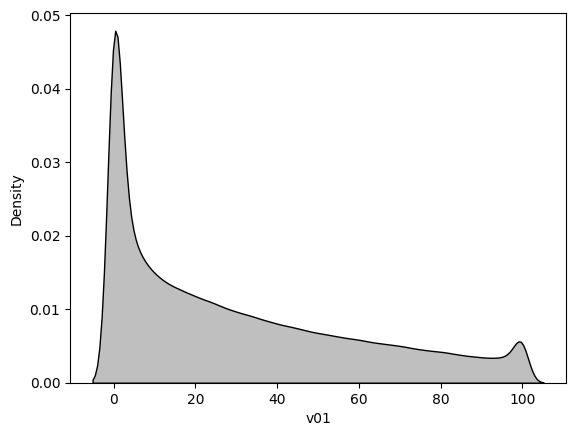

In [ ]:
sns.kdeplot(data=df_train, x='v01', color='black', fill=True)

<Axes: xlabel='v09', ylabel='Density'>

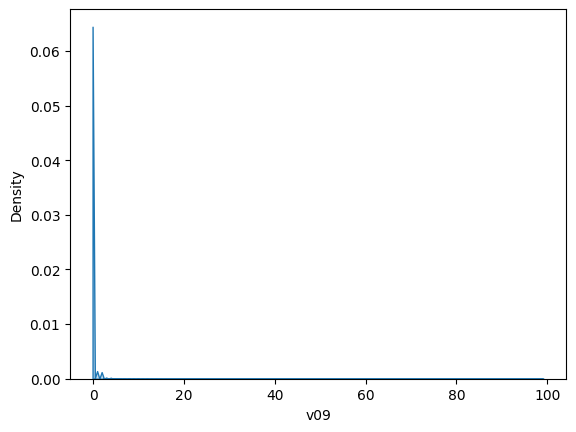

In [ ]:
sns.kdeplot(data=df_train, x='v09',fill=True)

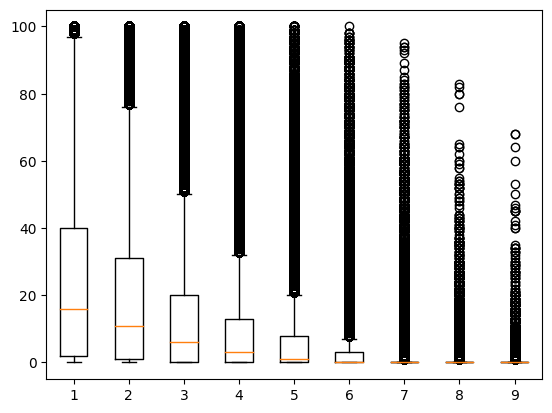

In [ ]:
ㅑplt.boxplot(df_train[df_train['class_interval']==0][['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']])
plt.show()

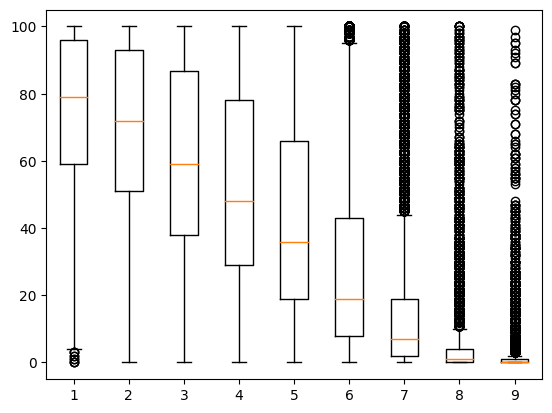

In [ ]:
ㅐplt.boxplot(df_train[df_train['class_interval']==9][['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']])
plt.show()

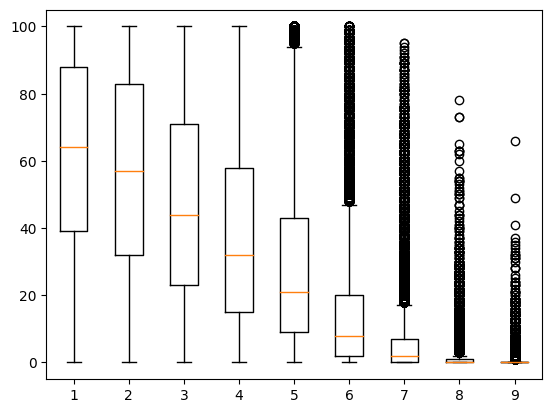

In [ ]:
plt.boxplot(df_train[df_train['class_interval']==5][['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']])
plt.show()

In [ ]:
df_train
corr_matrix = df_train.corr()
corr_matrix

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

ValueError: could not convert string to float: 'A'

In [ ]:
df_train['ef_year'] = df_train['ef_year'].replace({'A': 2015, 'B': 2016, 'C': 2017})

<ipython-input-49-52d29df7bb1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ef_year'] = df_train['ef_year'].replace({'A': 2015, 'B': 2016, 'C': 2017})


In [ ]:
df_train['fc_year'] = df_train['fc_year'].replace({'A': 2015, 'B': 2016, 'C': 2017})

<ipython-input-50-0178535a99af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fc_year'] = df_train['fc_year'].replace({'A': 2015, 'B': 2016, 'C': 2017})


In [ ]:
df_train['stn4contest'] = df_train['stn4contest'].replace({'STN001': 1, 'STN002': 2, 'STN003': 3,'STN004': 4, 'STN005': 5, 'STN006': 6,'STN007': 7, 'STN008': 8,'STN009': 9, 'STN010': 10,
                                                   'STN011': 11,'STN012': 12,'STN013': 13,'STN014': 14,'STN015': 15,'STN016': 16,'STN017': 17,'STN018': 18,'STN019': 19,'STN020': 20})

<ipython-input-54-0edefddeaba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['stn4contest'] = df_train['stn4contest'].replace({'STN001': 1, 'STN002': 2, 'STN003': 3,'STN004': 4, 'STN005': 5, 'STN006': 6,'STN007': 7, 'STN008': 8,'STN009': 9, 'STN010': 10,


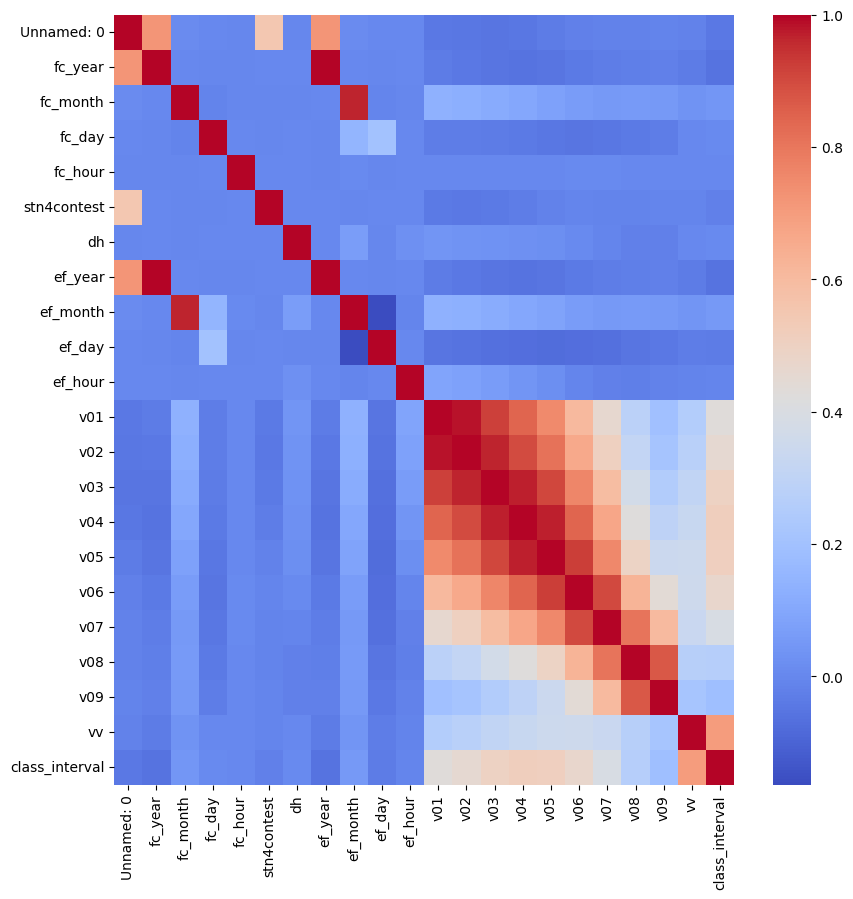

In [ ]:
corr_matrix = df_train.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

## 1. VarianceThreshold

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_train.csv')
df_train.columns = df_train.columns.str.replace('rainfall_train.', '', regex=False)
df_train = df_train[df_train['class_interval'] != -999]
df_train=pd.get_dummies(df_train, columns=['fc_year','stn4contest','ef_year'],drop_first=True)


selected_features 선택된 피처  Index(['fc_month', 'fc_day', 'fc_hour', 'dh', 'ef_month', 'ef_day', 'ef_hour',
       'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv',
       'fc_year_B', 'fc_year_C', 'ef_year_B', 'ef_year_C'],
      dtype='object')


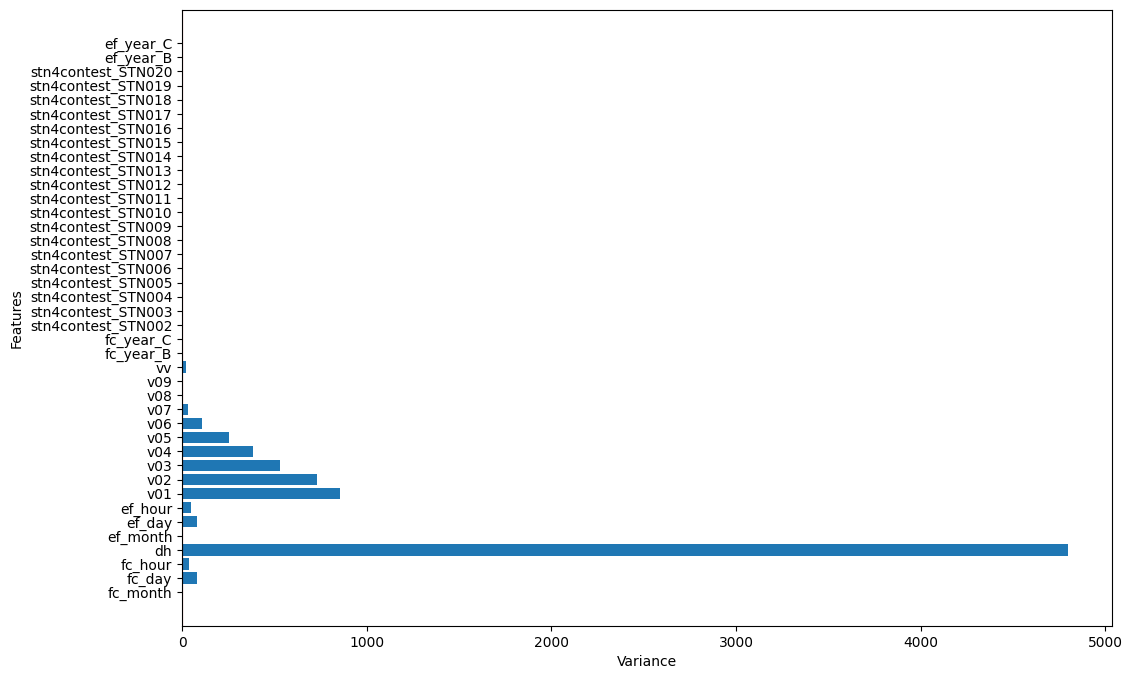

In [ ]:
X=df_train.drop(columns=['class_interval','Unnamed: 0'])
y=df_train['class_interval']


threshold =0.1
selector = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(X)

# 선택된 특성을 확인하기
selected_features=X.columns[selector.get_support(indices=True)]
print('selected_features 선택된 피처 ',selected_features)

#시각화로 간단하게 살펴보기

plt.figure(figsize=(12,8))
plt.barh(width= selector.variances_, y=X.columns)
plt.xlabel('Variance')
plt.ylabel('Features')
plt.axvline(x=threshold, color='r', label = 'threshold')

- v01, v02, v03 등의 변수들이 중요하나든 점 파악
- month, day, hour, dh는 어떻게 다룰 것이지 고려 필요

In [ ]:
selector.variances_

array([1.97724836e+00, 7.86023234e+01, 3.59999973e+01, 4.79684558e+03,
       2.11816308e+00, 7.84325128e+01, 4.72645952e+01, 8.55547450e+02,
       7.28881158e+02, 5.32670770e+02, 3.85846443e+02, 2.54951263e+02,
       1.08151943e+02, 3.42373227e+01, 5.22895942e+00, 1.23452000e+00,
       1.96999640e+01, 2.21119133e-01, 2.22619370e-01, 4.76365833e-02,
       4.76415513e-02, 4.75254071e-02, 4.71531487e-02, 4.72805878e-02,
       4.75067712e-02, 4.76881238e-02, 4.76055315e-02, 4.74030159e-02,
       4.76340992e-02, 4.75682663e-02, 4.75229224e-02, 4.74955893e-02,
       4.75800673e-02, 4.73185010e-02, 4.72495088e-02, 4.75154681e-02,
       4.77092350e-02, 4.72781016e-02, 2.21119133e-01, 2.22619370e-01])

In [ ]:
selector.get_support

<bound method SelectorMixin.get_support of VarianceThreshold(threshold=0.1)>

In [ ]:
selector

VarianceThreshold(threshold=0.1)

In [ ]:
X_reduced

array([[ 5.,  1.,  9., ...,  0.,  0.,  0.],
       [ 5.,  1.,  9., ...,  0.,  0.,  0.],
       [ 5.,  1.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 9., 30., 21., ...,  1.,  0.,  1.],
       [ 9., 30., 21., ...,  1.,  0.,  1.],
       [ 9., 30., 21., ...,  1.,  0.,  1.]])

## 2. SelectKBest, chi2

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_train.csv')
df_train.columns = df_train.columns.str.replace('rainfall_train.', '', regex=False)
df_train = df_train[df_train['class_interval'] != -999]

In [ ]:
#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
df_train['fc_year'] = label_encoder.fit_transform(df_train['fc_year'])
df_train['stn4contest'] = label_encoder.fit_transform(df_train['stn4contest'])
df_train['ef_year'] = label_encoder.fit_transform(df_train['ef_year'])
df_train

,Unnamed: 0,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,1,0,5,1,9,0,3,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,0,5,1,9,0,6,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,0,5,1,9,0,9,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,0,5,1,9,0,12,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,0,5,1,9,0,15,0,5,2,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,2,9,30,21,19,228,2,10,10,...,7,2,2,0,0,0,0,0,0.5,3
1457248,1457249,2,9,30,21,19,231,2,10,10,...,9,5,3,1,0,0,0,0,0.0,0
1457249,1457250,2,9,30,21,19,234,2,10,10,...,9,5,3,1,0,0,0,0,1.9,4
1457250,1457251,2,9,30,21,19,237,2,10,10,...,6,4,2,2,0,0,0,0,1.9,4


In [ ]:
X=df_train.drop(columns=['class_interval','Unnamed: 0'])
y=df_train['class_interval']

In [ ]:
# 카이제곱 적용
# 데이터셋 학습
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x7cbffc510dc0>)

<BarContainer object of 20 artists>

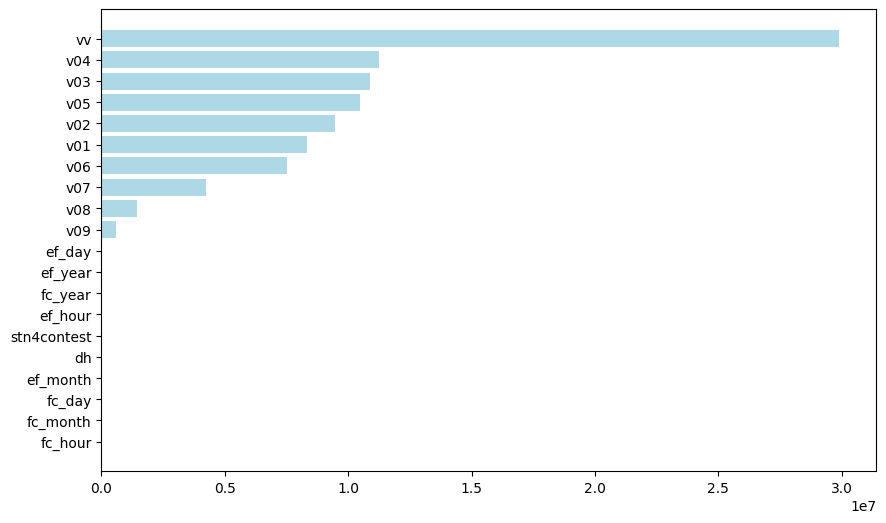

In [ ]:
# 카이제곱 점수 시각화

chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightblue')

- v04, v03, v05, v02, v01, v06, v07, v08, v09 순으로 상관관계가 높다

In [ ]:
chi_scores

,Feature,Score
3,fc_hour,5.859382e-01
1,fc_month,9.350525e+02
2,fc_day,1.027267e+03
7,ef_month,1.277940e+03
5,dh,1.953803e+03
4,stn4contest,2.825509e+03
9,ef_hour,3.828122e+03
0,fc_year,4.076190e+03
6,ef_year,4.076190e+03
8,ef_day,1.007022e+04


In [ ]:
chi_selector.scores_

array([4.07619001e+03, 9.35052547e+02, 1.02726709e+03, 5.85938243e-01,
       2.82550902e+03, 1.95380350e+03, 4.07619001e+03, 1.27794043e+03,
       1.00702179e+04, 3.82812161e+03, 8.34303051e+06, 9.47738090e+06,
       1.08802557e+07, 1.12526581e+07, 1.04633269e+07, 7.52446885e+06,
       4.23074199e+06, 1.45461618e+06, 6.12529772e+05, 2.99098578e+07])

## 3. Mutual Information

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_train.csv')
df_train.columns = df_train.columns.str.replace('rainfall_train.', '', regex=False)
df_train = df_train[df_train['class_interval'] != -999]

#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
df_train['fc_year'] = label_encoder.fit_transform(df_train['fc_year'])
df_train['stn4contest'] = label_encoder.fit_transform(df_train['stn4contest'])
df_train['ef_year'] = label_encoder.fit_transform(df_train['ef_year'])

X=df_train.drop(columns=['class_interval','Unnamed: 0'])
y=df_train['class_interval']

<BarContainer object of 20 artists>

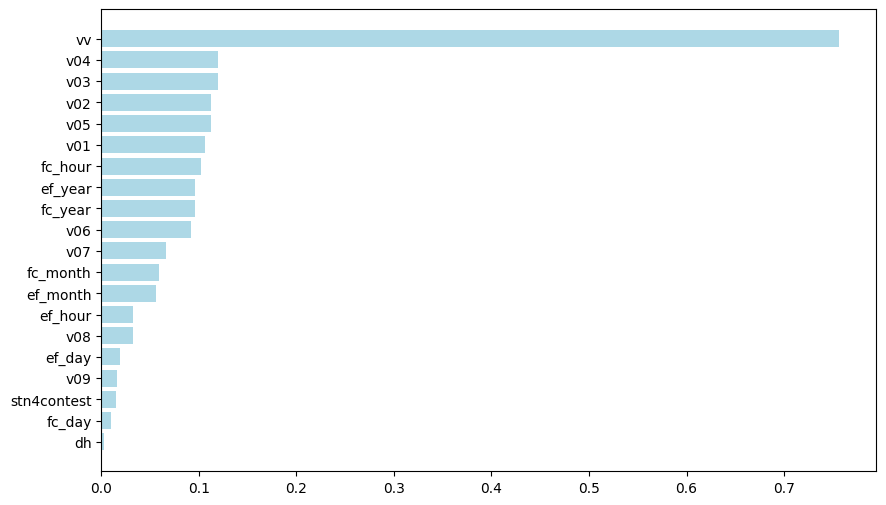

In [ ]:
# 뮤추얼정보 계산
mi_scores = mutual_info_classif(X,y, discrete_features='auto', random_state=111)

# 뮤튜얼정보시각화
mi_scores_df = pd.DataFrame({'Features':X.columns , 'MI Scores':mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=True)


# 시각화 진행
plt.figure(figsize=(10,6))
plt.barh(mi_scores_df['Features'], mi_scores_df['MI Scores'], color='lightblue')

fc_hour, ef_year 등 파악하기

## 4. RFECV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_test=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_test.csv')
df_train=pd.read_csv('/content/drive/MyDrive/BDA_2024 날씨 빅데이터 콘테스트/rainfall_train.csv')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train.columns = df_train.columns.str.replace('rainfall_train.', '', regex=False)
df_train = df_train[df_train['class_interval'] != -999]

#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
df_train['fc_year'] = label_encoder.fit_transform(df_train['fc_year'])
df_train['stn4contest'] = label_encoder.fit_transform(df_train['stn4contest'])
df_train['ef_year'] = label_encoder.fit_transform(df_train['ef_year'])

X=df_train.drop(columns=['class_interval','Unnamed: 0'])
y=df_train['class_interval']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# RFECV 설정 및 실행
rfecv = RFECV(
    estimator=LogisticRegression(solver='liblinear'),
    step=1,
    cv=StratifiedKFold(3),  # 폴드 수를 줄여서 실행 시간 단축
    scoring='accuracy',
    n_jobs=-1,  # 가능한 모든 CPU 코어 사용
    verbose=2
)

rfecv.fit(X_sample_scaled, y_sample)

# 선택된 변수 출력
selected_feature_rfecv = X.columns[rfecv.get_support()]
print("Selected features:", selected_feature_rfecv)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Selected features: Index(['fc_month', 'fc_day', 'dh', 'ef_year', 'ef_month', 'ef_day', 'ef_hour',
       'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'vv'],
      dtype='object')


In [ ]:
#런타임 오래걸리는 관계로 중지함
rfecv=RFECV(estimator = LogisticRegression(solver = 'liblinear'), step=1 , cv=StratifiedKFold(5),scoring='accuracy')
rfecv.fit(X,y)
selected_feature_rfecv = X.columns[rfecv.get_support()]
selected_feature_rfecv

## 5. Boruta

In [ ]:

rf = RandomForestClassifier(class_weight= 'balanced', max_depth=5)

# Borutapy 불러오기
boruta_selector=BorutaPy(rf, n_estimators='auto',random_state=111)
# selector 학습
boruta_selector.fit(X.values, y.values)

print('Selected Features:', X.columns[boruta_selector.support_].tolist())

# BorutaPy 시각화
import matplotlib.pyplot as plt

green_area=X.columns[boruta_selector.support_].tolist()
blue_area = X.columns[boruta_selector.support_weak_].tolist()

# 중요도기반의 랭킹으로
feat_importances =boruta_selector.ranking_

# 시각화 진행

plt.figure(figsize=(10,5))
plt.bar(X.columns, feat_importances, color = 'grey')
plt.bar(green_area, [1]*len(green_area), color='green',label='Confirmed Important')
plt.bar(blue_area, [2]*len(blue_area), color='blue',label='Not Confirmed Important')
plt.legend()

NameError: name 'BorutaPy' is not defined

# 모델 선정

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train[['v01', 'v02','v03','v04','v05','fc_hour']]
y = df_train['class_interval']

# 훈련 데이터셋으로 분할
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=30)

## 1. RandomForestClassifier

In [ ]:

model = RandomForestClassifier()

model.fit(X_train, y_train)


In [ ]:
# 예측 수행
y_pred = model.predict(X_test)

# y_test와 y_pred를 정규화된 값에서 원래 값으로 변환 (가정: y_scaler가 이미 정의됨)
y_test_actual = y_scaler.inverse_transform(y_test)
y_pred_actual = y_scaler.inverse_transform(y_pred)

# CSI 계산 함수 정의
def calculate_csi(y_true, y_pred, threshold):
    H = np.sum((y_true >= threshold) & (y_pred >= threshold))
    M = np.sum((y_true >= threshold) & (y_pred < threshold))
    F = np.sum((y_true < threshold) & (y_pred >= threshold))
    CSI = H / (H + M + F)
    return CSI

# 특정 임계값(threshold)을 설정 (예: 0.5)
threshold = 0.5

# CSI 계산
csi = calculate_csi(y_test_actual, y_pred_actual, threshold)
print(f"Critical Success Index (CSI): {csi}")